In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [23]:
data_train_path = r'C:\Users\ANISETUS B. MANALU\CERTAN_YES\HEWAN\training'
data_test_path = r'C:\Users\ANISETUS B. MANALU\CERTAN_YES\HEWAN\test'
data_val_path = r'C:\Users\ANISETUS B. MANALU\CERTAN_YES\HEWAN\validation'

In [24]:
img_width = 180
img_height =180 

In [25]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1617 files belonging to 4 classes.


In [26]:
data_cat = data_train.class_names

In [27]:
data_cat

['CHEETAH', 'HARIMAU', 'MACAN_TUTUL', 'SINGA']

In [28]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 1617 files belonging to 4 classes.


In [29]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 1617 files belonging to 4 classes.


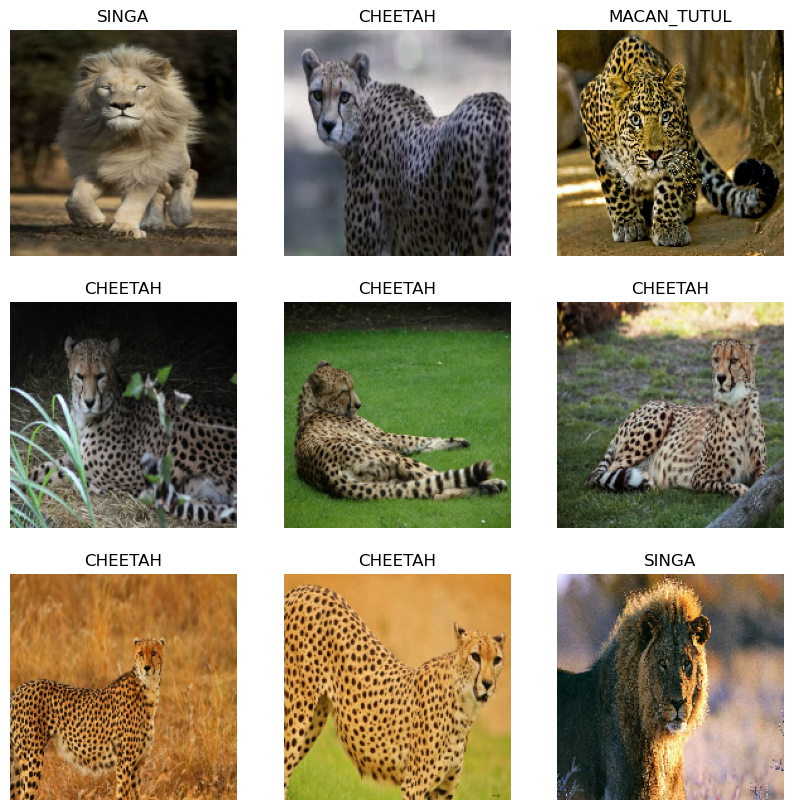

In [30]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),  # Dropout untuk mencegah overfitting
    layers.Dense(128, activation='relu'),  # Fully connected layer dengan 128 unit
    layers.Dense(len(data_cat), activation='softmax')  # Output layer dengan jumlah unit sesuai jumlah kategori
])


In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 583ms/step - accuracy: 0.6230 - loss: 1.1082 - val_accuracy: 0.6265 - val_loss: 1.0250
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 562ms/step - accuracy: 0.6469 - loss: 0.9156 - val_accuracy: 0.7069 - val_loss: 0.7473
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 551ms/step - accuracy: 0.6952 - loss: 0.7847 - val_accuracy: 0.7143 - val_loss: 0.6857
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 628ms/step - accuracy: 0.7031 - loss: 0.7405 - val_accuracy: 0.7848 - val_loss: 0.5566
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 618ms/step - accuracy: 0.7580 - loss: 0.6113 - val_accuracy: 0.8002 - val_loss: 0.5390
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 563ms/step - accuracy: 0.7875 - loss: 0.5480 - val_accuracy: 0.8157 - val_loss: 0.5226
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 559ms/step - accuracy: 0.8025 - loss: 0.4805 - val_accuracy: 0.7873 - val_loss: 0.5335
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 554ms/step - accuracy: 0.8102 - loss: 0.5076 - val_accu

Text(0.5, 1.0, 'Loss')

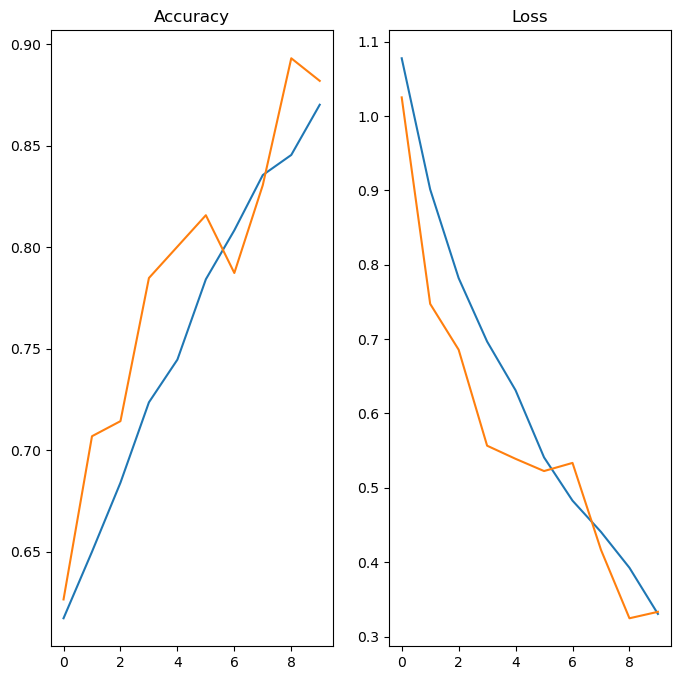

In [36]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [37]:
image = r'C:\Users\ANISETUS B. MANALU\CERTAN_YES\HEWAN\test\CHEETAH\lol.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [38]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


In [39]:
score = tf.nn.softmax(predict)

In [41]:
print('Animal in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Animal in image is CHEETAH with accuracy of 47.20


In [ ]:
model.save('Image_classify.h5')

In [ ]:
model = tf.keras.models.load_model('Image_classify.h5')